# Classification Model Baseline: Case Study of Baldness Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

DIR = os.getcwd()
os.chdir(os.path.join(DIR, 'drive/MyDrive/clf_baseline'))

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from src.utils import Preprocess

In [3]:
# read data

df_raw = pd.read_csv("data/data_kebotakan.csv")

In [4]:
df_raw.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [5]:
cat_col = ['jenis_kelamin', 'sampo']
num_col = ['umur', 'gaji', 'berat', 'tinggi', 'stress']
mapping = {
    'pendidikan' : {
        'SD' : 0,
        'SMP' : 1,
        'SMA' : 2,
        'S1': 3,
        'S2' : 4,
        'S3' : 5
    }
}

In [8]:
# df_raw.pendidikan.value_counts()

In [9]:
# import importlib

In [10]:
# import src.utils

In [11]:
# importlib.reload(src.utils)

In [12]:
# from src.utils import Preprocess

In [6]:
processor = Preprocess(df = df_raw,
                       cat_col = cat_col,
                       num_col = num_col,
                       mapping = mapping)

In [7]:
df_clean = processor.preprocess_data()

In [8]:
df_clean.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,botak_prob,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head,is_botak
0,0.333333,0.133143,1,0,0.163263,0.509473,1,0,0.444444,0.605974,1.0,0.0,0.0,1.0,0.0,1
1,0.680000,0.126454,1,0,0.379755,0.450662,0,0,0.666667,0.532860,1.0,0.0,0.0,1.0,0.0,1
2,0.466667,0.105930,1,0,0.070015,0.319429,0,0,0.333333,0.418442,1.0,0.0,1.0,0.0,0.0,0
3,0.453333,0.043812,1,0,0.130888,0.472398,1,3,0.888889,0.804050,1.0,0.0,0.0,0.0,0.0,1
4,0.480000,0.093439,1,0,0.238060,0.450478,1,1,0.000000,0.368371,0.0,1.0,0.0,0.0,0.0,0


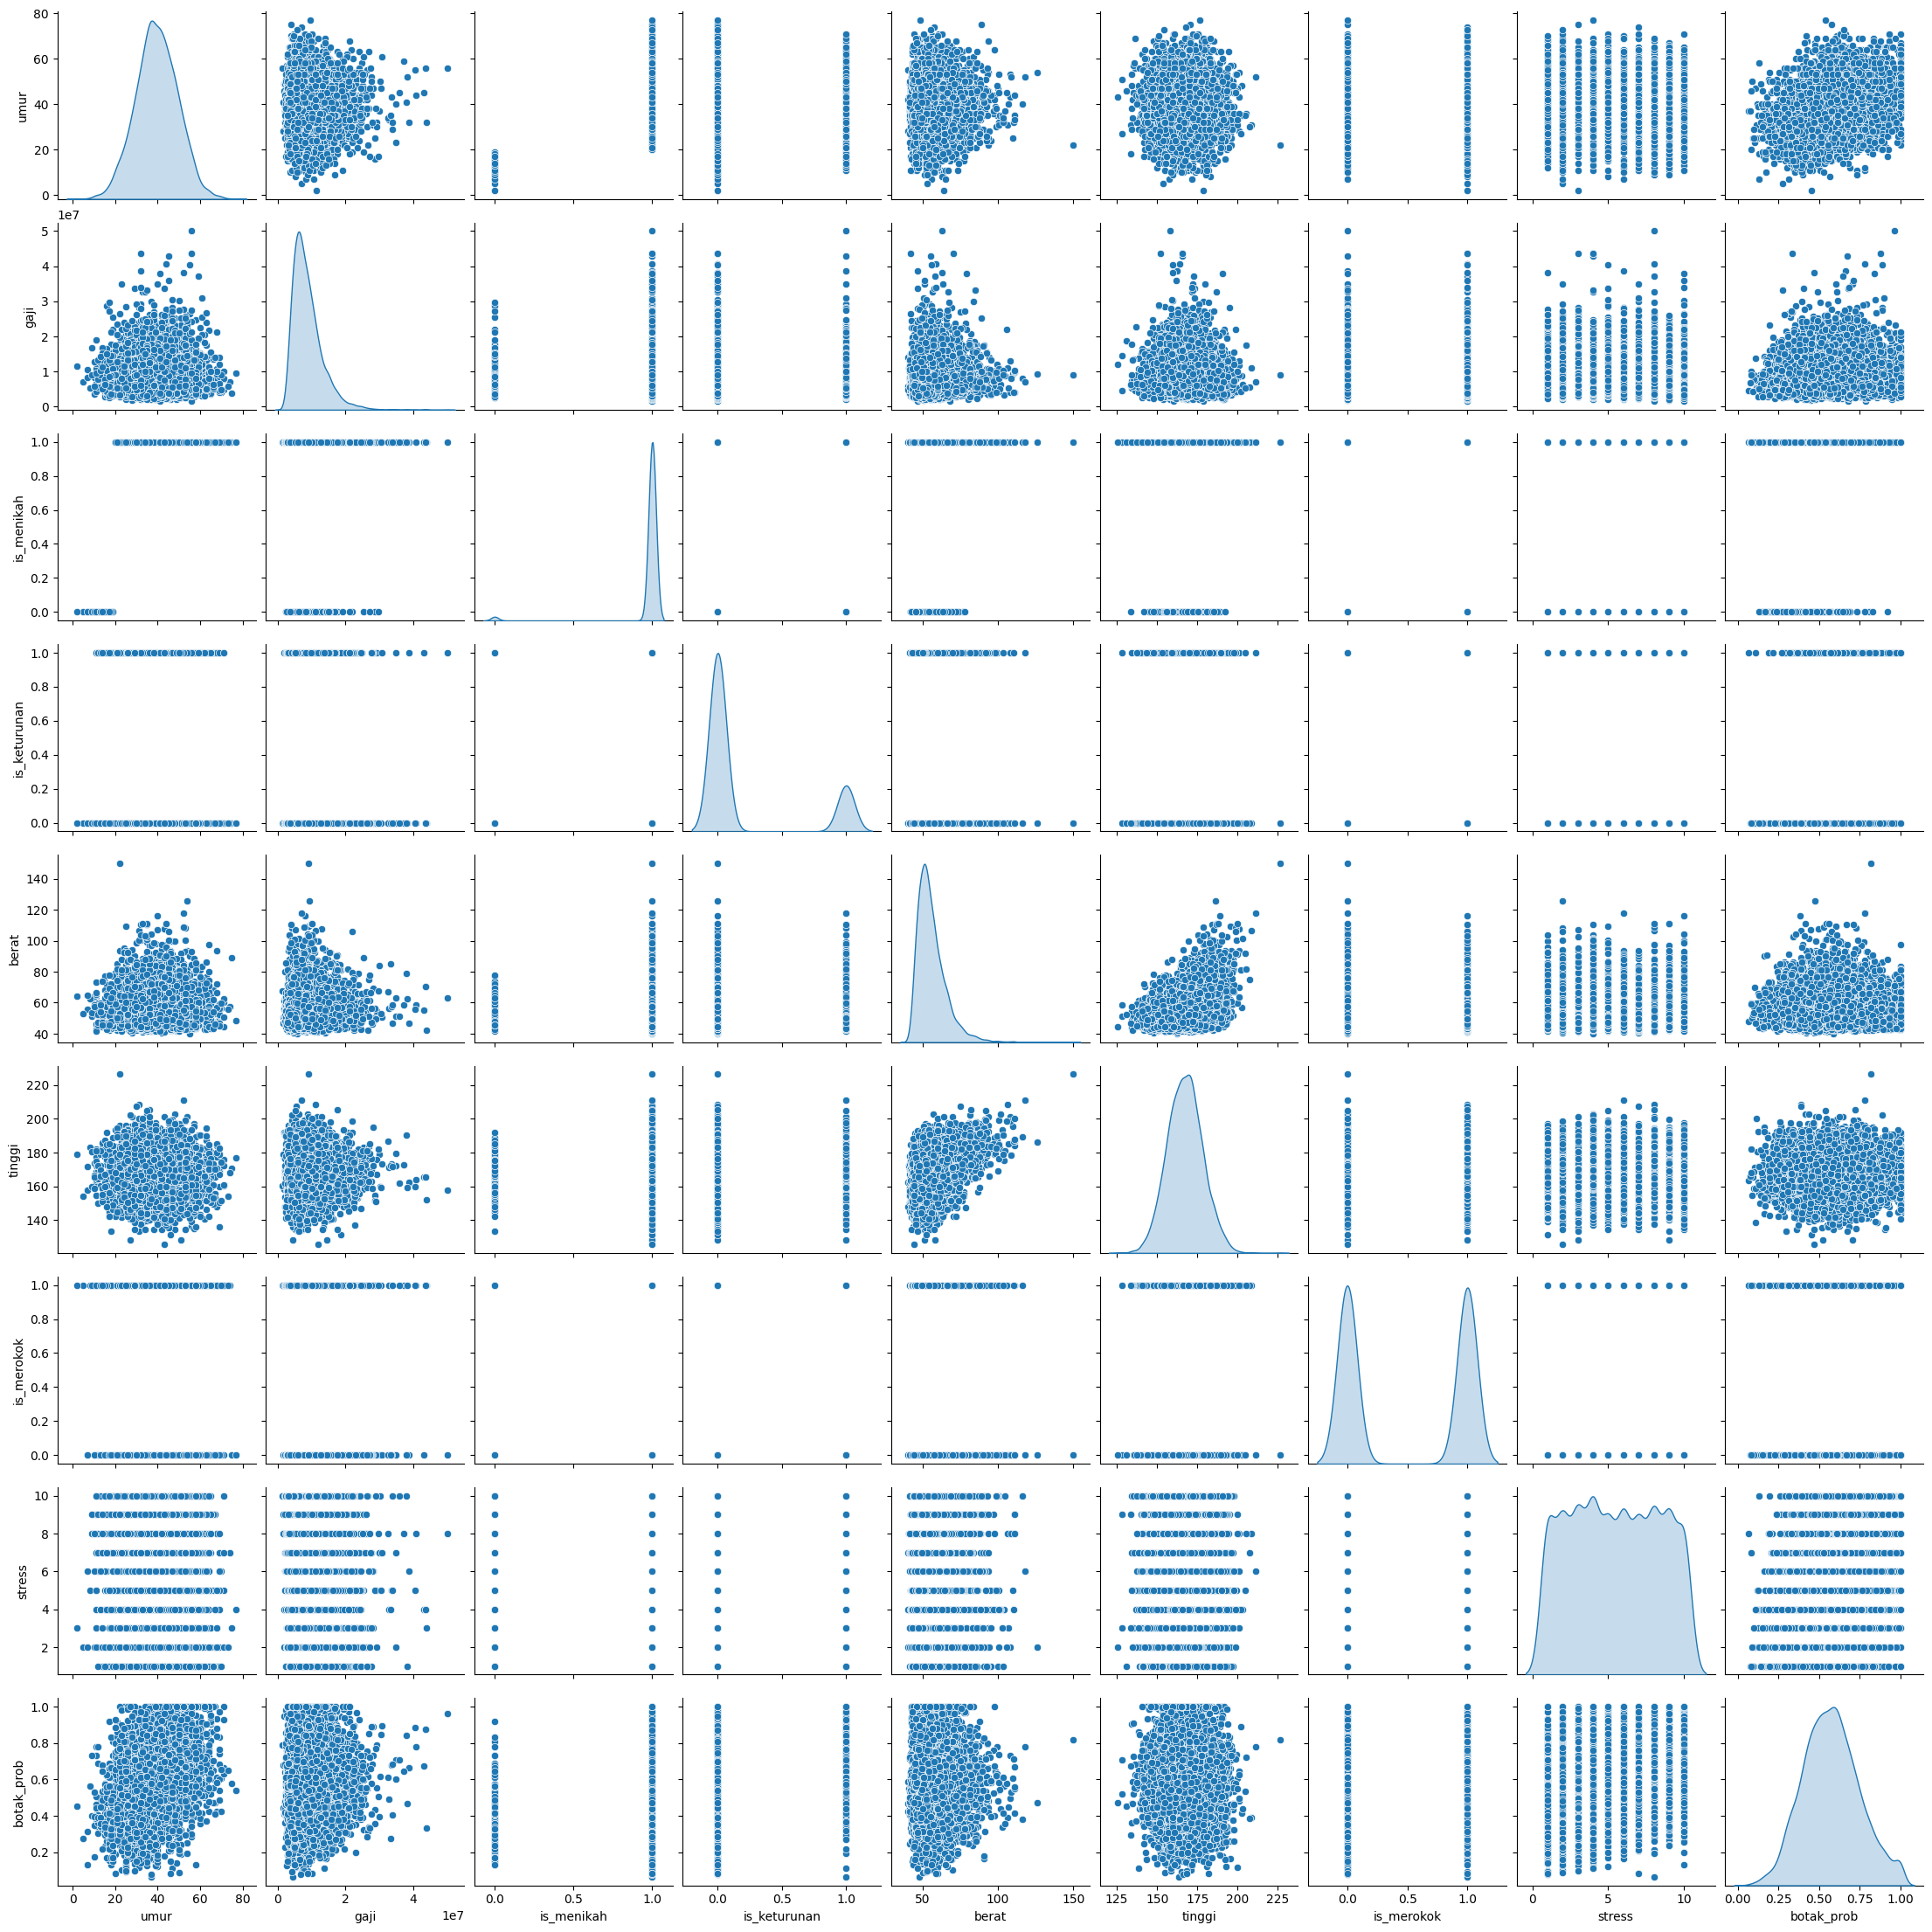

In [15]:
sns.pairplot(df_raw, diag_kind = 'kde')

In [17]:
sns.pairplot(df_clean, diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

In [11]:
df_clean.to_csv("data/clean_data_kebotakan.csv", index = False)

In [9]:
df_clean.is_botak.value_counts()

1    3895
0    2087
Name: is_botak, dtype: int64

In [10]:
df_clean.isna().sum()

umur                       0
gaji                       0
is_menikah                 0
is_keturunan               0
berat                      0
tinggi                     0
is_merokok                 0
pendidikan                 0
stress                     0
botak_prob                 0
jenis_kelamin_Perempuan    0
sampo_Merpati              0
sampo_Moonsilk             0
sampo_Pantone              0
sampo_Shoulder & Head      0
is_botak                   0
dtype: int64

## Train Test Split

In [12]:
y = df_clean['is_botak']
X = df_clean.drop(columns = ['is_botak', 'botak_prob'])

In [16]:
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
X.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
0,0.333333,0.133143,1,0,0.163263,0.509473,1,0,0.444444,1.0,0.0,0.0,1.0,0.0
1,0.680000,0.126454,1,0,0.379755,0.450662,0,0,0.666667,1.0,0.0,0.0,1.0,0.0
2,0.466667,0.105930,1,0,0.070015,0.319429,0,0,0.333333,1.0,0.0,1.0,0.0,0.0
3,0.453333,0.043812,1,0,0.130888,0.472398,1,3,0.888889,1.0,0.0,0.0,0.0,0.0
4,0.480000,0.093439,1,0,0.238060,0.450478,1,1,0.000000,0.0,1.0,0.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .25, stratify = y, random_state = 21
)

In [18]:
print(X_train.shape[0])
print(X_test.shape[0])

4486
1496


In [19]:
clf = LogisticRegression(random_state = 42)

In [20]:
# fit model to our data

clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
pred = clf.predict(X_test)

In [22]:
pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [23]:
# confusion matrix

cm = confusion_matrix(y_test, pred, labels=clf.classes_)

In [24]:
cm

array([[325, 197],
       [144, 830]])

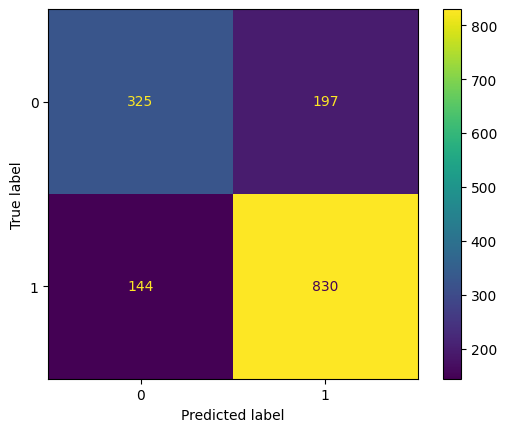

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.66       522
           1       0.81      0.85      0.83       974

    accuracy                           0.77      1496
   macro avg       0.75      0.74      0.74      1496
weighted avg       0.77      0.77      0.77      1496

